In [2]:
#exercice 1
import pandas as pd

# Chargement du fichier CSV
data = pd.read_csv('data_project.csv', sep = "\t")

# Affichage des premières lignes pour vérifier le chargement
data.head(1)


,venue,abstract,authors,n_citation,references,title,year,id,class
0,international conference on human-computer int...,The purpose of this study is to develop a lear...,"['Makoto Satoh', 'Ryo Muramatsu', 'Mizue Kayam...",0,"['51c7e02e-f5ed-431a-8cf5-f761f266d4be', '69b6...",Preliminary Design of a Network Protocol Learn...,2013,00127ee2-cb05-48ce-bc49-9de556b93346,3


In [3]:
# Création d'une nouvelle colonne 'text' qui combine 'abstract' et 'title'
# On remplace les valeurs manquantes par une chaîne vide.
data['text'] = data['abstract'].fillna('') + " " + data['title'].fillna('')

# Vérification : affichage des premières lignes
#print(data['text'].head(5))

# Construction de la matrice Documents x Termes avec TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    stop_words='english',   # suppression des mots-outils en anglais
    max_df=0.85,            # suppression des mots très fréquents (présents dans plus de 85% des documents)
    min_df=5,               # suppression des mots trop rares (apparition dans moins de 5 documents)
    lowercase=True          # conversion en minuscules
)

# Utilisation de la colonne 'text' pour la vectorisation
X = vectorizer.fit_transform(data['text'])


In [4]:
# Affichage de la taille de la matrice Documents x Termes
print("Dimensions de la matrice Documents x Termes:", X.shape)


Dimensions de la matrice Documents x Termes: (40596, 13769)


In [5]:
# Calcul du nombre total d’occurrences des mots du vocabulaire
word_counts = X.sum(axis=0).A1
vocab = vectorizer.get_feature_names_out()

# Création d'un DataFrame avec les mots et leurs fréquences
word_freq = pd.DataFrame({
    'word': vocab,
    'freq': word_counts
}).sort_values(by='freq', ascending=False)

# Affichage des 15 mots les plus fréquents
print("Les 15 mots les plus fréquents :")
print(word_freq.head(15))


Les 15 mots les plus fréquents :
              word        freq
1310         based  847.865082
3170          data  658.956904
13181        using  610.890774
12240      systems  588.031606
7913         model  586.991134
6323   information  491.633094
862       approach  469.332050
600      algorithm  441.733648
7060      learning  438.304142
714       analysis  410.635662
8877         paper  404.870657
12555         time  400.470902
7740        method  396.539579
8285      networks  375.807113
13537          web  364.408081


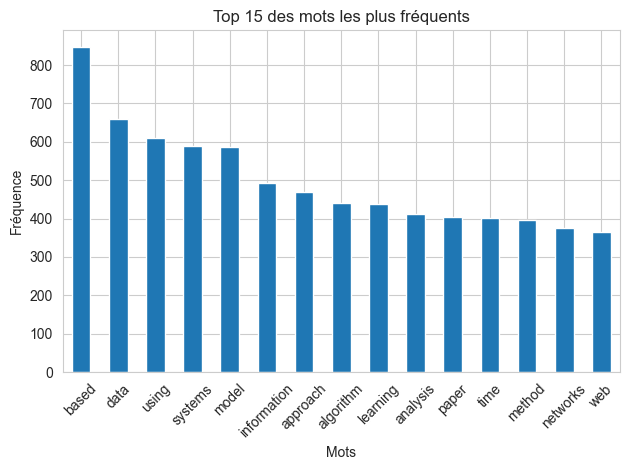

In [6]:
# Visualisation graphique des mots les plus fréquents
import matplotlib.pyplot as plt

word_freq.head(15).plot.bar(x='word', y='freq', legend=False)
plt.title("Top 15 des mots les plus fréquents")
plt.xlabel("Mots")
plt.ylabel("Fréquence")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [7]:
# Importations nécessaires
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Téléchargement des ressources (si nécessaire)
#nltk.download('punkt')
#nltk.download('wordnet')

# Fonction de tokenisation personnalisée
def custom_tokenizer(text, method="none"):
    # Convertir en minuscules
    text = text.lower()
    # Tokenisation
    tokens = word_tokenize(text)
    # Conserver uniquement les tokens alphabétiques
    tokens = [t for t in tokens if t.isalpha()]
    # Appliquer le traitement additionnel en fonction de la méthode choisie
    if method == "stem":
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(t) for t in tokens]
    elif method == "lemm":
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return tokens

# On suppose que la colonne 'text' a déjà été créée (combinaison de 'abstract' et 'title')
# Exemple :
# data = pd.read_csv('data_project.csv', sep='\t')
# data['text'] = data['abstract'].fillna('') + " " + data['title'].fillna('')

# Liste des méthodes de prétraitement à tester
methods = ["none", "stem", "lemm"]

for method in methods:
    print("Méthode de prétraitement :", method)

    # Création du vectorizer avec notre tokenizer personnalisé.
    # Le warning concernant 'token_pattern' peut être ignoré.
    vectorizer = TfidfVectorizer(
        tokenizer=lambda text: custom_tokenizer(text, method=method),
        stop_words='english',   # suppression des stopwords en anglais
        max_df=0.85,            # élimine les mots très fréquents
        min_df=5,               # élimine les mots trop rares
        lowercase=False         # déjà pris en charge dans notre tokenizer
    )

    # Vectorisation du corpus à partir de la colonne 'text'
    X = vectorizer.fit_transform(data['text'])

    # Calcul du nombre total d'occurrences pour chaque mot
    word_counts = X.sum(axis=0).A1
    vocab = vectorizer.get_feature_names_out()

    # Création d'un DataFrame avec les mots et leurs fréquences
    word_freq = pd.DataFrame({
        'word': vocab,
        'freq': word_counts
    }).sort_values(by='freq', ascending=False)

    # Affichage des 10 mots les plus fréquents
    print("Top 10 des mots les plus fréquents :")
    print(word_freq.head(10))
    print("\n" + "="*40 + "\n")


Méthode de prétraitement : none


/Users/antoinesirvent/miniconda3/envs/MasterMASTER/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Top 10 des mots les plus fréquents :
              word        freq
2781          data  663.050154
12227        using  642.672868
11336      systems  621.357223
7239         model  583.530257
1029         based  564.308195
5765   information  504.076286
600       approach  499.275690
353      algorithm  465.304197
6456      learning  431.339814
459       analysis  429.887077


Méthode de prétraitement : stem


/Users/antoinesirvent/miniconda3/envs/MasterMASTER/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/antoinesirvent/miniconda3/envs/MasterMASTER/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon'

Top 10 des mots les plus fréquents :
           word         freq
4284      model  1026.289704
7386        use   962.108927
6934        thi   749.617303
4527    network   732.070644
1580       data   704.258852
176   algorithm   691.384184
555        base   642.731775
325    approach   603.100629
4178     method   590.097941
3391     inform   551.899032


Méthode de prétraitement : lemm


/Users/antoinesirvent/miniconda3/envs/MasterMASTER/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/antoinesirvent/miniconda3/envs/MasterMASTER/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'u', 'wa'] not in stop_words.
  warnings.warn(


Top 10 des mots les plus fréquents :
              word        freq
6281         model  788.142784
6595       network  678.072637
2377          data  670.271375
313      algorithm  652.953279
10586        using  652.534975
525       approach  573.336861
893          based  571.350233
6143        method  566.430139
7711       problem  520.112342
5010   information  512.768656




In [8]:
# Exercice 3
# Choix de la méthode de prétraitement : ici on choisit 'lemm' pour la lemmatisation
preprocess_method = "lemm"

# Création d'un vectorizer TF-IDF utilisant notre tokenizer personnalisé avec lemmatization
vectorizer_lemm = TfidfVectorizer(
    tokenizer=lambda text: custom_tokenizer(text, method=preprocess_method),
    stop_words='english',   # suppression des stopwords en anglais
    max_df=0.85,            # élimination des mots trop fréquents
    min_df=5,               # élimination des mots trop rares
    lowercase=False         # déjà géré dans la fonction custom_tokenizer
)

# Ajustement du vectorizer sur la colonne 'text' qui combine 'abstract' et 'title'
X_lemm = vectorizer_lemm.fit_transform(data['text'])


/Users/antoinesirvent/miniconda3/envs/MasterMASTER/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/antoinesirvent/miniconda3/envs/MasterMASTER/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'u', 'wa'] not in stop_words.
  warnings.warn(


In [9]:
# Demande de la requête à l'utilisateur
query = "strawberry ice cream"

# Transformation de la requête en vecteur dans le même espace lemmatisé
query_vector = vectorizer_lemm.transform([query])

# Calcul de la similarité cosinus entre la requête et tous les documents
from sklearn.metrics.pairwise import cosine_similarity

cos_sim = cosine_similarity(query_vector, X_lemm).flatten()

# Nombre de documents à afficher
top_n = 5

# Récupération des indices des top documents (du plus similaire au moins)
top_indices = cos_sim.argsort()[::-1][:top_n]

print("\nRésultats de la recherche avec lemmatisation (similarité cosinus) :")
for rank, idx in enumerate(top_indices, start=1):
    print(f"Rank {rank} - Score: {cos_sim[idx]:.4f}")
    print("Titre :", data.loc[idx, "title"])
    abstract_text = data.loc[idx, "abstract"] if pd.notnull(data.loc[idx, "abstract"]) else ""
    print("Abstract :", abstract_text)
    print("-" * 50)




Résultats de la recherche avec lemmatisation (similarité cosinus) :
Rank 1 - Score: 0.7074
Titre : The International Collaborative Environment (ICE).
Abstract : 
--------------------------------------------------
Rank 2 - Score: 0.7018
Titre : Performance Evaluation of ICE - A New Object-Oriented Middleware.
Abstract : 
--------------------------------------------------
Rank 3 - Score: 0.3810
Titre : Non Uniform Cellular Automata Description of Signed Partition Versions of Ice and Sand Pile Models
Abstract : 
--------------------------------------------------
Rank 4 - Score: 0.1930
Titre : Generation of incremental parsers
Abstract : An incremental development environment for unrestricted context-free languages is described and tested. Our proposal includes a parse generator, an incremental facility to make the overall parsing efficient in the context of program development; and a graphical interface that provides a complete set of customization and trace facilities. The tool, baptize

Premiers documents avec leur cluster (TF‑IDF + K-means) :
                                               title  cluster_tfidf
0  Preliminary Design of a Network Protocol Learn...              1
1  A methodology for the physically accurate visu...              0
2  Comparison of GARCH, Neural Network and Suppor...              1
3  COMPARING GNG3D AND QUADRIC ERROR METRICS METH...              0
4  Improved Secret Image Sharing Method By Encodi...              4
5  A Self-Stabilizing Algorithm for Finding the C...              4
6  Fur Visualisation for Computer Game Engines an...              0
7  Multisymplectic Spectral Methods for the Gross...              2
8  Speech training systems using lateral shapes o...              4
9        Software Evolution through Transformations.              0


/var/folders/x8/0wbz06c97ng0_d8l2ptq061c0000gn/T/ipykernel_10469/2501756847.py:36: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  plt.tight_layout()
/Users/antoinesirvent/miniconda3/envs/MasterMASTER/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


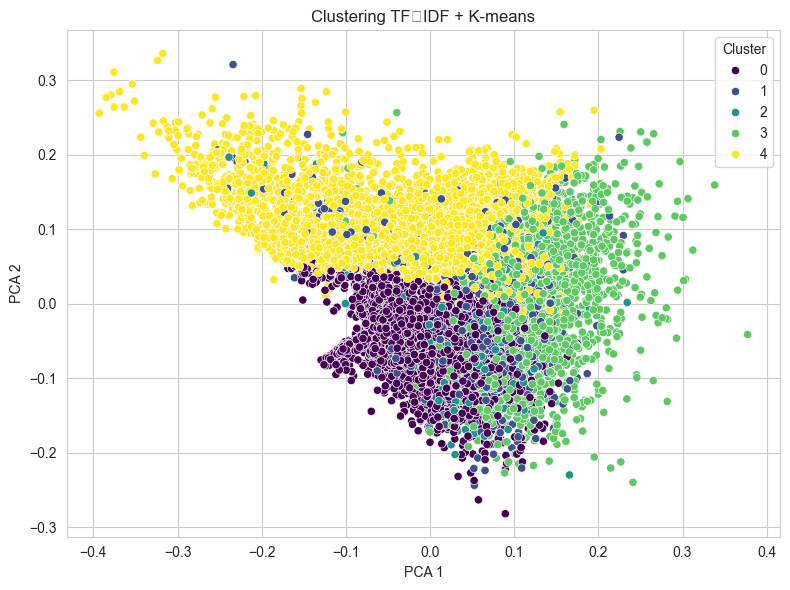

In [10]:
# Exercice 4
# 1. Clustering dans l’espace des mots (TF‑IDF + K-means)


import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# On suppose que le DataFrame 'data' contient déjà la colonne 'text' (abstract + title)
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.85, min_df=5)
X_tfidf = vectorizer.fit_transform(data['text'])

# Choix du nombre de clusters (à ajuster)
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters_tfidf = kmeans.fit_predict(X_tfidf)

# Affectation des clusters au DataFrame
data['cluster_tfidf'] = clusters_tfidf
print("Premiers documents avec leur cluster (TF‑IDF + K-means) :")
print(data[['title', 'cluster_tfidf']].head(10))

# Visualisation par réduction de dimension (PCA)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_tfidf.toarray())

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters_tfidf, palette='viridis')
plt.title("Clustering TF‑IDF + K-means")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


In [11]:
# Cellule LDA lemmatisé

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import gensim
from gensim import corpora
from gensim.models import LdaModel

# (Décommenter si besoin)
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_lemm(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_words and len(t) > 2]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return tokens

# Appliquer le prétraitement lemmatisé sur la colonne 'text'
texts_lemm = data['text'].apply(preprocess_lemm).tolist()

# Création d'un dictionnaire Gensim
dictionary_lemm = corpora.Dictionary(texts_lemm)
dictionary_lemm.filter_extremes(no_below=5, no_above=0.7)

# Construction du corpus
corpus_lemm = [dictionary_lemm.doc2bow(tokens) for tokens in texts_lemm]

# Entraînement du modèle LDA
num_topics = 5
lda_model_lemm = LdaModel(
    corpus=corpus_lemm,
    num_topics=num_topics,
    id2word=dictionary_lemm,
    random_state=42,
    passes=10
)

# Affichage des thématiques
print("Thématiques extraites (LDA sur textes lemmatisés) :")
for topic_num, topic_words in lda_model_lemm.print_topics(num_words=5):
    print("Catégorie {} : {}".format(topic_num, topic_words))


Thématiques extraites (LDA sur textes lemmatisés) :
Catégorie 0 : 0.017*"system" + 0.011*"user" + 0.010*"information" + 0.008*"model" + 0.008*"process"
Catégorie 1 : 0.025*"algorithm" + 0.023*"problem" + 0.008*"method" + 0.008*"result" + 0.008*"time"
Catégorie 2 : 0.017*"method" + 0.017*"data" + 0.014*"image" + 0.013*"using" + 0.011*"model"
Catégorie 3 : 0.023*"network" + 0.020*"system" + 0.016*"data" + 0.010*"application" + 0.009*"performance"
Catégorie 4 : 0.016*"language" + 0.014*"model" + 0.013*"system" + 0.009*"knowledge" + 0.009*"approach"


In [12]:
def get_dominant_topic(bow):
    topics = lda_model_lemm.get_document_topics(bow)
    if topics:
        return max(topics, key=lambda x: x[1])[0]
    return None

data['topic_lda_lemm'] = [get_dominant_topic(bow) for bow in corpus_lemm]

print("\nPremiers documents avec leur thématique dominante (lemmatisée) :")
print(data[['title', 'topic_lda_lemm']].head(10))



Premiers documents avec leur thématique dominante (lemmatisée) :
                                               title  topic_lda_lemm
0  Preliminary Design of a Network Protocol Learn...               0
1  A methodology for the physically accurate visu...               0
2  Comparison of GARCH, Neural Network and Suppor...               2
3  COMPARING GNG3D AND QUADRIC ERROR METRICS METH...               1
4  Improved Secret Image Sharing Method By Encodi...               3
5  A Self-Stabilizing Algorithm for Finding the C...               1
6  Fur Visualisation for Computer Game Engines an...               0
7  Multisymplectic Spectral Methods for the Gross...               1
8  Speech training systems using lateral shapes o...               2
9        Software Evolution through Transformations.               0


In [13]:
# 3. Clustering basé sur des plongements via Doc2Vec

import nltk
from nltk.tokenize import word_tokenize

def tokenize(text):
    return word_tokenize(text.lower())


from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import numpy as np

# Préparation des documents tagués pour Doc2Vec
documents = [TaggedDocument(words=tokenize(doc), tags=[i]) for i, doc in enumerate(data['text'])]

# Entraînement du modèle Doc2Vec
d2v_model = Doc2Vec(documents, vector_size=100, window=5, min_count=5, workers=4, epochs=40, seed=42)

# Extraction des vecteurs pour chaque document
doc_vectors = np.array([d2v_model.dv[i] for i in range(len(documents))])

# Application de K-means sur ces vecteurs
kmeans_d2v = KMeans(n_clusters=n_clusters, random_state=42)
clusters_d2v = kmeans_d2v.fit_predict(doc_vectors)
data['cluster_d2v'] = clusters_d2v

print("Premiers documents avec leur cluster (Doc2Vec + K-means) :")
print(data[['title', 'cluster_d2v']].head(10))


Premiers documents avec leur cluster (Doc2Vec + K-means) :
                                               title  cluster_d2v
0  Preliminary Design of a Network Protocol Learn...            1
1  A methodology for the physically accurate visu...            3
2  Comparison of GARCH, Neural Network and Suppor...            0
3  COMPARING GNG3D AND QUADRIC ERROR METRICS METH...            1
4  Improved Secret Image Sharing Method By Encodi...            1
5  A Self-Stabilizing Algorithm for Finding the C...            1
6  Fur Visualisation for Computer Game Engines an...            1
7  Multisymplectic Spectral Methods for the Gross...            1
8  Speech training systems using lateral shapes o...            0
9        Software Evolution through Transformations.            1


In [14]:
# Exercice 5

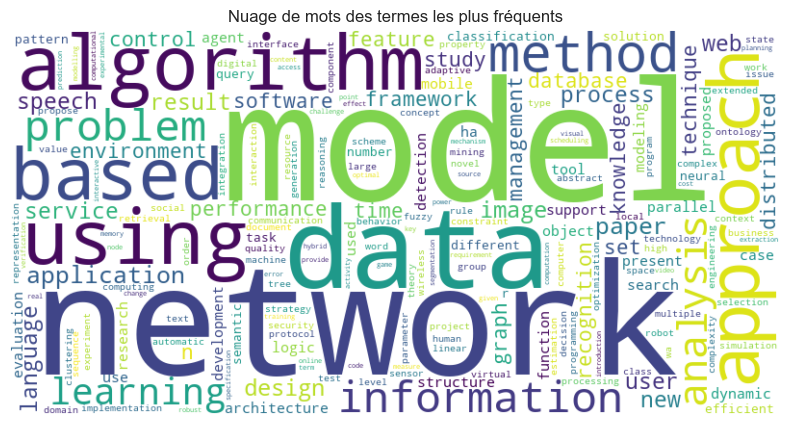

In [15]:
# %%
# Exercice 5
# Exemple de visualisation du corpus via un nuage de mots (word cloud)
# (Assurez-vous d'avoir installé la librairie 'wordcloud' au préalable :
#  pip install wordcloud)

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Supposons que vous disposiez déjà d'un DataFrame 'word_freq'
# contenant les mots et leur fréquence, comme dans l'exemple précédent :
# word_freq = pd.DataFrame({'word': vocab, 'freq': word_counts}).sort_values(by='freq', ascending=False)

# Convertir le DataFrame en dictionnaire {mot: fréquence}
freq_dict = dict(zip(word_freq['word'], word_freq['freq']))

# Génération du nuage de mots
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'  # vous pouvez changer la couleur de fond ici
).generate_from_frequencies(freq_dict)

# Affichage
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nuage de mots des termes les plus fréquents")
plt.show()


Top 15 bigrams (co-occurrences) dans le corpus :
                     bigram  freq
18344        paper presents  1227
21638             real time  1139
9257   experimental results  1041
18348         paper propose  1023
18341         paper present   888
21646            real world   769
20864       proposed method   699
25165             state art   682
16877        neural network   671
18242       paper describes   617
3962             case study   600
16878       neural networks   581
12533   information systems   579
25057    speech recognition   572
13521           large scale   557


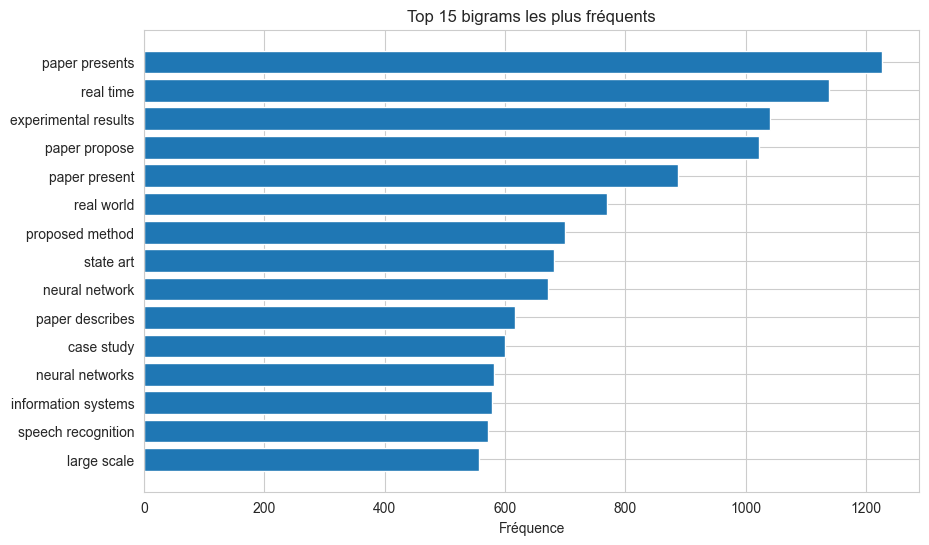

In [16]:
# %%
# Exemple d'extraction et de visualisation des co-occurrences (bigrams) les plus fréquentes
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Exemple : on suppose que vous avez un DataFrame 'data' avec une colonne 'text' contenant le texte
# Vous pouvez ajuster 'min_df' (et éventuellement 'max_df') pour filtrer davantage.
vectorizer_bigrams = CountVectorizer(
    stop_words='english',
    ngram_range=(2, 2),  # On se concentre ici sur des bigrams
    min_df=5            # Ne conserve que les bigrams apparaissant dans au moins 5 documents
)

# Application du vectorizer
X_bigrams = vectorizer_bigrams.fit_transform(data['text'])

# Somme de chaque bigram sur toutes les lignes
sum_bigrams = X_bigrams.sum(axis=0).A1  # A1 convertit le tableau en un 1D array
bigram_vocab = vectorizer_bigrams.get_feature_names_out()

# Création d'un DataFrame (bigram, freq)
bigram_freq = pd.DataFrame({
    'bigram': bigram_vocab,
    'freq': sum_bigrams
}).sort_values(by='freq', ascending=False)

# Affichage des 15 co-occurrences les plus fréquentes
top_n = 15
top_bigrams = bigram_freq.head(top_n)

print(f"Top {top_n} bigrams (co-occurrences) dans le corpus :")
print(top_bigrams)

# Visualisation en barres horizontales
plt.figure(figsize=(10, 6))
plt.barh(top_bigrams['bigram'][::-1], top_bigrams['freq'][::-1])
plt.xlabel("Fréquence")
plt.title(f"Top {top_n} bigrams les plus fréquents")
plt.show()


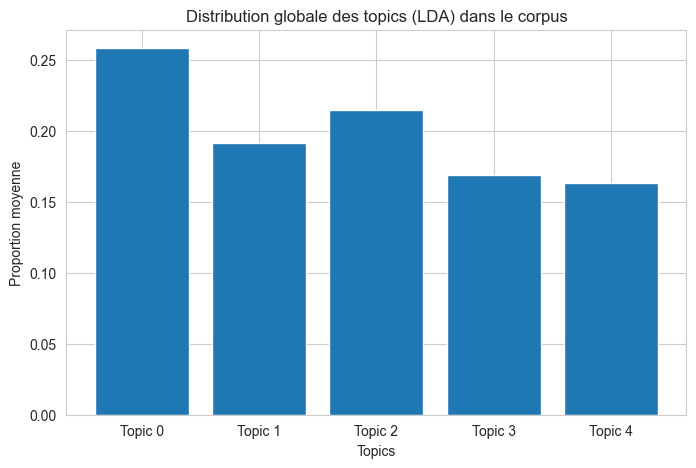

In [17]:
# %%
# Exemple pour visualiser la distribution globale des thématiques (topics) extraites par LDA

import numpy as np
import matplotlib.pyplot as plt

# Supposons :
# - que 'lda_model_lemm' est votre modèle LDA entraîné (type gensim.models.ldamodel.LdaModel)
# - que 'corpus_lemm' est la liste des documents sous forme de sacs de mots (bow) pour Gensim
# - que 'num_topics' est le nombre de topics du modèle

# 1) Obtenir, pour chaque document, le ou les topics et probabilités associées
doc_topics = [lda_model_lemm.get_document_topics(bow) for bow in corpus_lemm]

# 2) Calculer la distribution moyenne de chaque topic dans le corpus
#    i.e. la somme des probabilités du topic sur tous les documents, puis normalisée
topic_proportions = np.zeros(num_topics)
for doc_dist in doc_topics:
    for (topic_id, prob) in doc_dist:
        topic_proportions[topic_id] += prob

# Normalisation
topic_proportions /= len(doc_topics)

# 3) Visualisation de la distribution des topics sous forme de barres
plt.figure(figsize=(8,5))
plt.bar(range(num_topics), topic_proportions, tick_label=[f"Topic {i}" for i in range(num_topics)])
plt.title("Distribution globale des topics (LDA) dans le corpus")
plt.xlabel("Topics")
plt.ylabel("Proportion moyenne")
plt.show()

# ----------
# Autre idée : compter combien de documents ont un 'topic dominant' donné
# ----------
# dominant_topics = []
# for bow in corpus_lemm:
#     topics_probs = lda_model_lemm.get_document_topics(bow)
#     # Tri par probabilité décroissante et prise du topic le plus probable
#     best_topic = max(topics_probs, key=lambda x: x[1])[0]
#     dominant_topics.append(best_topic)

# from collections import Counter
# topic_counts = Counter(dominant_topics)
#
# # On peut ensuite tracer un diagramme en barres du nombre de documents par topic dominant
# plt.bar(topic_counts.keys(), topic_counts.values())
# plt.title("Répartition des documents par topic dominant")
# plt.xlabel("Topic")
# plt.ylabel("Nombre de documents")
# plt.show()


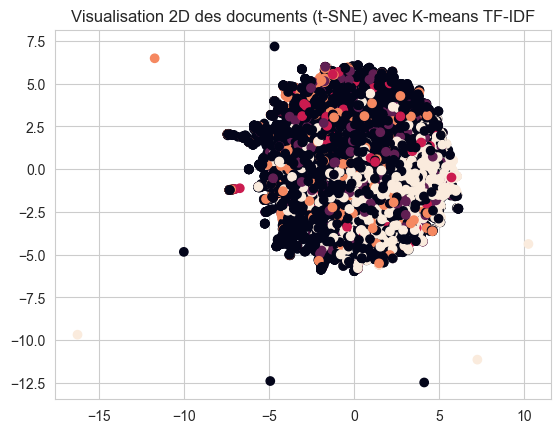

In [18]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_2d = tsne.fit_transform(X_tfidf.toarray())  # ou doc_vectors pour Doc2Vec

plt.scatter(X_2d[:,0], X_2d[:,1], c=clusters_tfidf)
plt.title("Visualisation 2D des documents (t-SNE) avec K-means TF-IDF")
plt.show()


In [19]:
# %%
# Exercice 6 du TP2 : Etiqueter les catégories (clusters ou thématiques).
# ----------------------------------------------------------------------
# Objectif : pour chaque cluster ou topic, on veut extraire des "étiquettes"
# qui aident à comprendre / résumer ce qui caractérise la catégorie.
#
# Dans cet exemple, on illustre 2 approches possibles :
#   1) Les mots les plus fréquents / importants dans chaque catégorie (clusters K-means TF-IDF).
#   2) Les documents les plus "centraux" pour chaque catégorie (ceux qui sont proches du centroid).
#
# Vous pouvez adapter ce code si vous utilisez LDA (topic_lda_lemm) ou Doc2Vec (cluster_d2v).

import numpy as np
import pandas as pd

# On suppose que :
#   - 'data' est votre DataFrame principal
#   - 'X_tfidf' est la matrice TF-IDF (documents x termes)
#   - 'vectorizer' est l'objet TfidfVectorizer déjà entraîné (pour retrouver les noms de termes)
#   - 'cluster_tfidf' est la colonne du DataFrame 'data' contenant le n° de cluster pour chaque doc
#     (ex : data['cluster_tfidf'] = kmeans.fit_predict(X_tfidf))
#
# Note : Si vous utilisez LDA, remplacez cluster_tfidf par topic_lda_lemm,
# ou tout autre colonne indiquant la "catégorie" ou "thématique".


# --- 1) Les mots-clés les plus caractéristiques de chaque cluster ---

# Récupération de la liste des termes du vocabulaire TF-IDF
terms = vectorizer.get_feature_names_out()

# Conversion de la matrice X_tfidf en array pour manipuler plus facilement (si ce n'est pas déjà le cas)
X_tfidf_array = X_tfidf.toarray()

# Regrouper les documents par cluster
n_clusters = data['cluster_tfidf'].nunique()
cluster_labels = sorted(data['cluster_tfidf'].unique())

# Pour stocker les top mots par cluster
top_words_by_cluster = {}

# Pour chaque cluster, on identifie les documents du cluster,
# on calcule la somme TF-IDF par terme, et on prend les mots les plus grands.
for c in cluster_labels:
    # indices des docs qui appartiennent au cluster c
    indices = data.index[data['cluster_tfidf'] == c]

    # somme des TF-IDF de tous les docs du cluster c, sur chaque terme
    # shape : (n_terms,)
    cluster_tfidf_sum = X_tfidf_array[indices].sum(axis=0)

    # on récupère les indices des termes classés par ordre décroissant de somme TF-IDF
    top_term_indices = np.argsort(cluster_tfidf_sum)[::-1]

    # on choisit le nombre de mots qu'on veut pour "étiqueter" le cluster (ex. 10)
    nb_top_words = 10
    top_indices = top_term_indices[:nb_top_words]

    # on récupère les mots correspondants
    top_terms = [(terms[idx], cluster_tfidf_sum[idx]) for idx in top_indices]

    top_words_by_cluster[c] = top_terms

print("=== Principaux mots-clés par cluster (K-means TF-IDF) ===")
for c in cluster_labels:
    print(f"\nCluster {c} :")
    for (w, score) in top_words_by_cluster[c]:
        print(f"   {w} (score={score:.2f})")


# --- 2) Les documents les plus "centraux" (ou les plus proches du centroid) ---
#
# Approche : on calcule le centroïde du cluster (moyenne TF-IDF de tous ses docs),
# puis on mesure la distance (similaire ou inverse) pour chaque doc du cluster.
# Les plus proches peuvent être considérés comme "exemples typiques" ou "centraux".

from sklearn.metrics.pairwise import euclidean_distances

# On suppose qu'on a déjà le kmeans qui a été entraîné sur X_tfidf
# centre de chaque cluster dans l'espace TF-IDF (de dimension n_terms)
centroids = kmeans.cluster_centers_  # shape : (n_clusters, n_terms)

# Pour stocker les docs les plus centraux
most_central_docs = {}

for c in cluster_labels:
    # indices des docs du cluster c
    indices_c = data.index[data['cluster_tfidf'] == c]

    # distances Euclidiennes entre chaque doc du cluster et le centroid
    # X_tfidf_array[indices_c].shape : (nb_docs_cluster, n_terms)
    dists = euclidean_distances(
        X_tfidf_array[indices_c],
        centroids[c].reshape(1, -1)
    ).flatten()  # shape : (nb_docs_cluster,)

    # on trie par distance croissante
    sorted_idx = np.argsort(dists)

    # on prend par exemple les 3 docs les plus proches
    nb_docs_centrals = 3
    best_idx = sorted_idx[:nb_docs_centrals]

    # On récupère les vrais index (dans le DataFrame) de ces docs
    central_doc_indices = indices_c[best_idx]

    most_central_docs[c] = central_doc_indices

print("\n=== Documents les plus centraux par cluster ===")
for c in cluster_labels:
    doc_ids = most_central_docs[c]
    print(f"\nCluster {c} :")
    for did in doc_ids:
        title = str(data.loc[did, 'title'])[:80]  # on affiche un bout du titre (80 char max)
        print(f"  - Doc index: {did}, titre: {title}...")

# --------------------------------------------------------------------------
# Idées supplémentaires pour aller plus loin :
#   - Calculer des métriques plus "discriminantes" en pénalisant les mots
#     trop présents dans tous les clusters (ex: TF-IDF "intra-cluster" vs "inter-cluster").
#   - Identifier des bigrams spécifiques avec un CountVectorizer(ngram_range=(2,2))
#     appliqué sur le sous-corpus de chaque cluster.
#   - Représenter ces mots-clés / bigrams sous forme de nuages de mots.
#   - Pour l'approche LDA, faire la même chose mais en s'appuyant sur la distribution
#     des topics (topic_lda_lemm) pour filtrer les docs, et en ré-analysant leur vocabulaire.


=== Principaux mots-clés par cluster (K-means TF-IDF) ===

Cluster 0 :
   systems (score=372.90)
   based (score=299.70)
   information (score=273.41)
   using (score=239.67)
   networks (score=227.45)
   software (score=208.81)
   analysis (score=208.23)
   knowledge (score=205.29)
   management (score=195.59)
   approach (score=178.94)

Cluster 1 :
   model (score=410.25)
   design (score=239.81)
   based (score=96.66)
   systems (score=68.92)
   models (score=67.65)
   software (score=56.23)
   process (score=55.90)
   using (score=55.35)
   language (score=43.31)
   approach (score=42.83)

Cluster 2 :
   multi (score=197.86)
   agent (score=183.36)
   agents (score=109.70)
   based (score=42.89)
   systems (score=40.03)
   mobile (score=26.68)
   using (score=22.22)
   approach (score=22.19)
   learning (score=21.91)
   model (score=20.35)

Cluster 3 :
   data (score=460.08)
   web (score=315.00)
   based (score=86.04)
   mining (score=79.43)
   information (score=68.52)
   service

In [35]:
import pandas as pd
import ast
import networkx as nx

# Chargement du DataFrame
df = pd.read_csv("data_project.csv", sep = "\t")

# Créer le graphe dirigé
G = nx.DiGraph()

# 1) Ajouter tous les articles du DataFrame comme nœuds
all_ids = set(df['id'])  # ensemble de tous les ID présents
G.add_nodes_from(all_ids)

# 2) Parcourir chaque ligne et ajouter les arcs internes
for idx, row in df.iterrows():
    article_id = row['id']

    # Convertir la colonne references en liste Python (si nécessaire)
    if pd.notnull(row['references']):
        references_list = ast.literal_eval(row['references'])
    else:
        references_list = []

    # Pour chaque ref_id, on crée un arc article_id -> ref_id,
    # seulement si ref_id est aussi dans all_ids
    for ref_id in references_list:
        if ref_id in all_ids:
            G.add_edge(article_id, ref_id)

# Vérifier le résultat
print("Nombre de nœuds :", G.number_of_nodes())  # devrait être égal à len(df)
print("Nombre d'arêtes :", G.number_of_edges())


Nombre de nœuds : 40596
Nombre d'arêtes : 3641


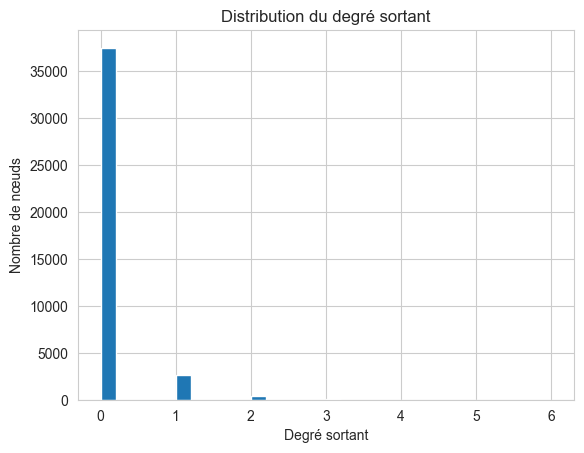

Densité du graphe : 2.2093518727627886e-06
Clustering moyen (non orienté) : 0.004982536257785051
Taille de la plus grande SCC : 2
Diamètre de la plus grande SCC : 1


In [41]:
import networkx as nx
import matplotlib.pyplot as plt

# Supposons que G soit votre graphe dirigé déjà construit

# -- Degrés --
out_degs = dict(G.out_degree())
in_degs  = dict(G.in_degree())

plt.hist(list(out_degs.values()), bins=30)
plt.title("Distribution du degré sortant")
plt.xlabel("Degré sortant")
plt.ylabel("Nombre de nœuds")
plt.show()

# -- Densité --
densite = nx.density(G)
print("Densité du graphe :", densite)

# -- Clustering --
G_undirected = G.to_undirected()
clust_moyen  = nx.average_clustering(G_undirected)
print("Clustering moyen (non orienté) :", clust_moyen)

# -- Plus grande composante fortement connectée --
largest_scc = max(nx.strongly_connected_components(G), key=len)
print("Taille de la plus grande SCC :", len(largest_scc))

# Sous-graphe de cette SCC
G_scc = G.subgraph(largest_scc).copy()

# -- Diamètre (version non orientée) --
diametre = nx.diameter(G_scc.to_undirected())
print("Diamètre de la plus grande SCC :", diametre)
